In [205]:
# Import required libraries
import numpy as np
import pandas as pd

In [206]:
# Download fastai library
! pip install fastbook


In [207]:
import fastbook

In [208]:
# Import required libraries
from fastbook import *
from IPython.display import display,HTML

In [209]:
# Import NLP module from fastai library
from fastai.text.all import *

In [339]:
# Read 1/6th of the train dataset to reduce total time taken for training
train = pd.read_csv('train.csv')
train.head()

,Unnamed: 0,Unnamed: 0.1,user,content,country,Pro Trump,Pro Biden,Neutral,date,replyCount,retweetCount,likeCount,one_hot_labels,classes
0,245,245,"{'username': 'mmmagis', 'displayname': 'Mikhail M.Mavlyashev', 'id': 919308076678877186, 'description': 'Негоже кочать кармушку)', 'rawDescription': 'Негоже кочать кармушку)', 'descriptionUrls': [], 'verified': False, 'created': datetime.datetime(2017, 10, 14, 21, 5, tzinfo=datetime.timezone.utc), 'followersCount': 2, 'friendsCount': 64, 'statusesCount': 228, 'favouritesCount': 131, 'listedCount': 1, 'mediaCount': 16, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1347701799059337216/FteK7lwg_normal.jpg', 'p...",On Trump's superiority theory: https://t.co/esMRt1OLEd,Russia,0,0,1,2020-12-14 22:52:26+00:00,0,0,0,1,Neutral
1,1181,1181,"{'username': 'ELTUCOSITO', 'displayname': 'Michael Grippekoven', 'id': 40937878, 'description': 'Xpert B2B #marketing, CX, #sales \nLikes AI, Emobility, LPG +hydrogen\nLoves #classiccars 👨\u200d🔧+retro 🚴\u200d♂️\n\n(Onions are my own ;o)', 'rawDescription': 'Xpert B2B #marketing, CX, #sales \nLikes AI, Emobility, LPG +hydrogen\nLoves #classiccars 👨\u200d🔧+retro 🚴\u200d♂️\n\n(Onions are my own ;o)', 'descriptionUrls': [], 'verified': False, 'created': datetime.datetime(2009, 5, 18, 18, 50, 31, tzinfo=datetime.timezone.utc), 'followersCount': 1167, 'friendsCount': 5001, 'statusesCount': 47...","Nice day all! Whatever happens with whatever.. #No1knows Now,that #trump goes its way,#virus is to follow pretty soon,I guess And what i guess,never happens.. 🙄 Just make sure that entire flat had been painted + restored,before the virus ends. Otherwise you will never do it.. 🙂 https://t.co/OxLQZ3KgYP",Brazil,0,0,1,2020-11-18 21:40:31+00:00,0,0,0,1,Neutral
2,189,189,"{'username': 'uzionmain', 'displayname': 'David Uzumeri', 'id': 865316879707099136, 'description': 'he/him', 'rawDescription': 'he/him', 'descriptionUrls': [], 'verified': False, 'created': datetime.datetime(2017, 5, 18, 21, 23, 15, tzinfo=datetime.timezone.utc), 'followersCount': 1693, 'friendsCount': 322, 'statusesCount': 27705, 'favouritesCount': 32747, 'listedCount': 10, 'mediaCount': 1533, 'location': 'Toronto, Ontario', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1195031032803676160/DAMQApqw_normal.jpg', 'profileBa...",Donald Trump...... what a guy,Canada,0,0,1,2020-11-10 00:35:47+00:00,0,0,2,1,Neutral
3,1153,1176,"{'username': 'jacksina666985', 'displayname': 'Jacksina', 'id': 953615407390298112, 'description': 'GOOD OLD DAYS out now', 'rawDescription': 'GOOD OLD DAYS out now', 'descriptionUrls': [], 'verified': False, 'created': datetime.datetime(2018, 1, 17, 13, 10, 5, tzinfo=datetime.timezone.utc), 'followersCount': 17, 'friendsCount': 39, 'statusesCount': 221, 'favouritesCount': 823, 'listedCount': 0, 'mediaCount': 100, 'location': 'Islamic Republic of Iran', 'protected': False, 'linkUrl': 'https://flow.page/jacksina', 'linkTcourl': 'https://t.co/bx5PPCCG9n', 'profileImageUrl': 'https://pbs.twim...","@JoeBiden Hi Mr.president ... may I ask you sth that you can do it easily, please remove some fucking restrictions of Instagram in Iran ... we are suffocating under the pressure of fucking politicians game, the people is innocent and only sacrificing 😞😓 Tnx for ur consideration",Iran,1,0,0,2020-11-14 18:47:14+00:00,0,0,0,100,Pro_Trump
4,327,327,"{'username': 'farida_rust', 'displayname': 'Farida_Rust', 'id': 429680502, 'description': 'Architect/ Part time Artist/ MA Architecture in University of Huddersfield, UK', 'rawDescription': 'Architect/ Part time Artist/ MA Architecture in University of Huddersfield, UK', 'descriptionUrls': [], 'verified': False, 'created': datetime.datetime(2011, 12, 6, 7, 49, 5, tzinfo=datetime.timezone.utc), 'followersCount': 91, 'friendsCount': 92, 'statusesCount': 1077, 'favouritesCount': 426, 'listedCount': 2, 'media

In [340]:
# Read 1/6th of the test dataset to reduce total time taken for testing
test = pd.read_csv('test.csv')
test.head()

,Unnamed: 0,content,date,replyCount,retweetCount,likeCount,mentionedUsers,Pro Trump,Pro Biden,Neutral,one_hot_labels,classes
0,0,@Prieto_de_Maria @Sanju_Verma_ @realDonaldTrump #Biden opposed #CAA #NRC and support Pakistani stand on JK and #Article370,2020-11-04 12:58:14+00:00,0,0,0,"[{'username': 'Prieto_de_Maria', 'displayname': 'Light_Yagami', 'id': 1137341225839628288, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}, {'username': 'Sanju_Verma_', 'displayname': 'Sanju Verma', 'id': 2441854915, 'description': None, 'rawDescription': None, 'descriptionUrls'...",0,0,1,1,Neutral
1,1,@FoxNews #Trump applauded historical turn out of voters. And no evidence of what #Biden’s campaign manager called it”#outrageous”. Nadia must correctly refer to the words Trump said.&gt;Biden’s campaign manager calls Trump's statement outrageous. ABC News via @ABC - https://t.co/m5UzFp8pWi,2020-11-04 12:19:42+00:00,0,1,1,"[{'username': 'FoxNews', 'displayname': 'Fox News', 'id': 1367531, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}, {'username': 'ABC', 'displayname': 'ABC News', 'id': 28785486, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': N...",1,0,0,100,Pro_Trump
2,7,@ge0rgiasc0tt Can't imagine they are chomping at the bit to vote #Biden or #Trump ? 🙄 #ElectionDay,2020-11-03 23:48:59+00:00,0,0,0,"[{'username': 'ge0rgiasc0tt', 'displayname': 'G', 'id': 762339458, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}]",0,0,1,1,Neutral
3,9,"@IvankaTrump @kayleighmcenany @realDonaldTrump Sympathetic . Far better candidate than #Biden . But , #COVID19 will be the ' downfall ' More empathy and leading by example was required \n#ElectionDay",2020-11-03 09:00:13+00:00,0,0,0,"[{'username': 'IvankaTrump', 'displayname': 'Ivanka Trump', 'id': 52544275, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}, {'username': 'kayleighmcenany', 'displayname': 'Kayleigh McEnany', 'id': 259001548, 'description': None, 'rawDescription': None, 'descriptionUrls': None, ...",1,0,0,100,Pro_Trump
4,10,Got my 2nd graders chanting “#Biden”,2020-11-03 07:17:00+00:00,1,0,0,NaN,0,1,0,10,Pro_Biden


In [212]:
# Check major statistics for the train dataset
train.describe()

,Unnamed: 0,Unnamed: 0.1,Pro Trump,Pro Biden,Neutral,replyCount,retweetCount,likeCount,one_hot_labels
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,948.747240,954.265543,0.282394,0.282394,0.435212,0.743754,1.005230,7.453806,31.498547
std,414.779563,551.894150,0.450295,0.450295,0.495929,12.006587,12.529569,83.848502,43.145537
min,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,646.000000,477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,954.000000,953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1258.000000,1436.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,100.000000
max,1908.000000,1911.000000,1.000000,1.000000,1.000000,485.000000,439.000000,2732.000000,100.000000


In [213]:
# Check major statistics for the test dataset
test.describe()

,Unnamed: 0,replyCount,retweetCount,likeCount,Pro Trump,Pro Biden,Neutral,one_hot_labels
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,54.384615,0.428571,1.439560,7.384615,0.296703,0.439560,0.263736,35.417582
std,28.601387,1.407463,9.962383,39.394520,0.459335,0.499083,0.443099,43.445001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,79.500000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,100.000000
max,102.000000,11.000000,93.000000,328.000000,1.000000,1.000000,1.000000,100.000000


<AxesSubplot:>

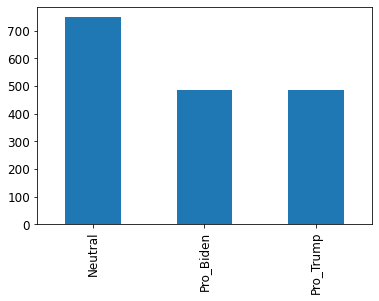

In [214]:
# Check the distribution of the number of data points for each of the 5 classes
train['classes'].value_counts().plot(kind='bar')

In [215]:
# The distribution seems fairly equal which is perfect for training the model
train['classes'].value_counts()

Neutral      749
Pro_Biden    486
Pro_Trump    486
Name: classes, dtype: int64

In [216]:
# Array of all the reviews in the train data frame
txts = L([i for i in train['content']])

In [217]:
# Tokenize all the rows
tok = Tokenizer.from_df(train)
tok.setup(train)

toks = txts.map(tok)
toks[0]

(#17) ['xxbos','xxmaj','on','xxmaj','trump',"'s",'superiority','theory',':','\n'...]

In [218]:
# Numericalize all the tokens from the previous step
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([ 2,  8, 44,  8, 18, 47,  0,  0, 13, 27])

In [219]:
# Seeing the indexes of how the words are stored for the first row only
num.encodes(toks[0])

TensorText([ 2,  8, 44,  8, 18, 47,  0,  0, 13, 27, 16, 13, 10, 10, 15, 10,  0])

In [220]:
# Decoding the indexes to see the tokens
num.decode(nums[0])

(#17) ['xxbos','xxmaj','on','xxmaj','trump',"'s",'xxunk','xxunk',':','\n'...]

In [341]:
# Concatening just the reviews column of both train and test datasets to help in creating the language model
language_model = pd.concat([train, test], axis=0)[['content']]
language_model.head()

,content
0,On Trump's superiority theory: https://t.co/esMRt1OLEd
1,"Nice day all! Whatever happens with whatever.. #No1knows Now,that #trump goes its way,#virus is to follow pretty soon,I guess And what i guess,never happens.. 🙄 Just make sure that entire flat had been painted + restored,before the virus ends. Otherwise you will never do it.. 🙂 https://t.co/OxLQZ3KgYP"
2,Donald Trump...... what a guy
3,"@JoeBiden Hi Mr.president ... may I ask you sth that you can do it easily, please remove some fucking restrictions of Instagram in Iran ... we are suffocating under the pressure of fucking politicians game, the people is innocent and only sacrificing 😞😓 Tnx for ur consideration"
4,"@JoeBiden, urge you to respect international law. Otherwise, youâ€™re violating int. law, human rights and refugee rights. Research before you state this conflict! Those who violate int. law and support state terror cannot be selected as US president! #terrorism #USElection #biden https://t.co/Bzq8eHjMYP"


In [222]:
# Checking major statistics of the new dataset
language_model.describe()

,content
count,1812
unique,1790
top,Where is our MOTA BHAI.?\nwhy he is not helping donaald Trump to form government in America.. ( amrika) \n\n#AmericaDecides2020 #India #Elecciones2020 #modii #TrumpIsLosing #AmitShah
freq,2


In [342]:
# Splitting the new dataset randomly into 90% train and 10% validation 
data_lm = DataBlock(
    blocks=TextBlock.from_df('content', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) 
)

In [343]:
# Internally tokenizing and numericalizing the data. The sequence length used is the default used for training the Wikipedia 103 language model
data_lm = data_lm.dataloaders(language_model, bs=64, seq_len=72)

In [344]:
# Randomly show 5 of the rows from the language model
data_lm.show_batch(max_n=5)

,text,text_
0,"xxbos i can not stop looking at this xxrep 3 ! it is absolutely xxunk . xxrep 5 🤣 # bidenharris2020 # fucktrump @ xxmaj xxunk xxmaj xxunk xxunk xxmaj xxunk , xxmaj xxunk https : / / t.co / xxunk xxbos xxunk xxunk xxunk # mypresident xxmaj thank you xxmaj sir for standing up for what is right . xxbos @joebiden xxmaj which game ? xxmaj my president elected 🇵 🇸","i can not stop looking at this xxrep 3 ! it is absolutely xxunk . xxrep 5 🤣 # bidenharris2020 # fucktrump @ xxmaj xxunk xxmaj xxunk xxunk xxmaj xxunk , xxmaj xxunk https : / / t.co / xxunk xxbos xxunk xxunk xxunk # mypresident xxmaj thank you xxmaj sir for standing up for what is right . xxbos @joebiden xxmaj which game ? xxmaj my president elected 🇵 🇸 xxmaj"
1,… . also @potus @realdonaldtrump said to “ stop working on stimulus and focus on xxup xxunk ” … # xxunk # xxunk # novemberiscoming xxbos xxmaj trump xxunk early ballot in xxmaj florida : ' i voted for a guy xxunk xxmaj trump ' https : / / t.co / xxunk xxbos xxmaj has anyone checked on xxmaj xxunk xxmaj trump in xxunk ? xxmaj xxunk like he ’s probably not,. also @potus @realdonaldtrump said to “ stop working on stimulus and focus on xxup xxunk ” … # xxunk # xxunk # novemberiscoming xxbos xxmaj trump xxunk early ballot in xxmaj florida : ' i voted for a guy xxunk xxmaj trump ' https : / / t.co / xxunk xxbos xxmaj has anyone checked on xxmaj xxunk xxmaj trump in xxunk ? xxmaj xxunk like he ’s probably not doing
2,of xxunk parties is xxunk at 3 % . ðÿ¤ ” xxmaj we will have to wait and see whether this will be close to reality . https : / / t.co / xxunk xxbos xxunk will be the xxunk man on xxmaj earth today . xxunk xxunk # xxmaj biden2020 # joebiden # byebyetrump xxbos xxmaj remember when xxmaj america elected the host of the xxmaj xxunk as president ? #,xxunk parties is xxunk at 3 % . ðÿ¤ ” xxmaj we will have to wait and see whether this will be close to reality . https : / / t.co / xxunk xxbos xxunk will be the xxunk man on xxmaj earth today . xxunk xxunk # xxmaj biden2020 # joebiden # byebyetrump xxbos xxmaj remember when xxmaj america elected the host of the xxmaj xxunk as president ? # dumptrump
3,@realdonaldtrump # xxup maga by xxunk the defeat ! xxmaj nothing to be ashamed of - in a democracy … xxbos i do n’t know if xxmaj i ’m living or just waiting for the results . # xxmaj biden # xxmaj elections2020 xxbos xxmaj joe xxmaj biden won xxrep 6 ! get over it xxmaj trump supporters u already lost bye xxmaj trump xxrep 8 💙 https : / / t.co,# xxup maga by xxunk the defeat ! xxmaj nothing to be ashamed of - in a democracy … xxbos i do n’t know if xxmaj i ’m living or just waiting for the results . # xxmaj biden # xxmaj elections2020 xxbos xxmaj joe xxmaj biden won xxrep 6 ! get over it xxmaj trump supporters u already lost bye xxmaj trump xxrep 8 💙 https : / / t.co /
4,all xxunk up . # makeamericagreatagainagain # xxmaj trump2020 # joebidenkamalaharris2020 https : / / t.co / xxunk xxbos xxmaj trump has xxmaj divided the xxmaj country more than xxmaj ever ! xxmaj no xxmaj one wants to xxmaj admit to xxmaj it ! xxmaj especially him ! xxmaj tuesday will come and it will be whatever it will be ! xxup america xxup will xxup go xxup on ! ðÿ‡ºðÿ‡¸ xxbos,xxunk up . # makeamericagreatagainagain # xxmaj trump2020 # joebidenkamalaharris2020 https : / / t.co / xxunk xxbos xxmaj trump has xxmaj divided the xxmaj country more than xxmaj ever ! xxmaj no xxmaj one wants to xxmaj admit to xxmaj it ! xxmaj especially him ! xxmaj tuesday will come and it will be whatever it will be ! xxup america xxup will xxup go xxup on ! ðÿ‡ºðÿ‡¸ xxbos #


In [347]:
# Defining the LSTM architecture of the train model and the metrics used to acertain its accuracy
learn_model = language_model_learner(
    data_lm, AWD_LSTM, drop_mult=0.3,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [348]:
# Check the various layers of the model
learn_model.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(1832, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(1832, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=1832, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(lr_min=0.09120108485221863, lr_steep=0.03981071710586548)

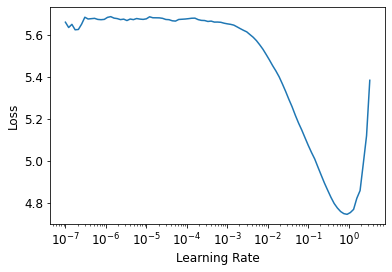

In [349]:
# Find the best learning rate for training the language model
learn_model.lr_find()

In [350]:
# Fine tuning the language model based on the datablock which would enable in predicting the next word in a sentence for the Amazon Reviews dataset specifically
learn_model.fine_tune(4, 1e-1)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.525373,3.660703,0.311372,38.888660,00:05


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.243450,3.416777,0.343989,30.471039,00:07
1,3.001476,3.380710,0.345291,29.391621,00:07
2,2.658143,3.425405,0.359332,30.735083,00:07
3,2.309782,3.540214,0.360525,34.474289,00:07


In [351]:
# Save the encoder that understands the intricate language semantics of our dataset
learn_model.save_encoder('finetuned_encoder')

In [352]:
# Load the encoder that understands the intricate language semantics of our dataset
learn_model.load_encoder('finetuned_encoder')

In [353]:
# Predict the full sentence of a negative prompt using our trained language model
learn_model.predict("This laptop was horrible because", 30, temperature=0.80)

'This laptop was horrible because the Virus Virus Two - year - old will likely to virus from everyone in America , # uselections You are the only president'

In [354]:
# Predict the full sentence of a positive prompt using our trained language model
learn_model.predict("I absolutely loved this dress because", 20, temperature=0.80)

"i absolutely loved this xxunk because of her . So i knows the results , and i hope we 'll see changes soon in my"

In [237]:
# Download necessary libraries for Easy Data Augmentation (EDA)
!pip install -U nltk

Requirement already up-to-date: nltk in /opt/conda/envs/fastai/lib/python3.8/site-packages (3.5)


In [238]:
# Download necessary libraries for Easy Data Augmentation (EDA)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [355]:
# Make new dataframe containing 10x less data than the train dataset because EDA would generate new data from lesser existing data
eda = pd.read_csv('train.csv')
eda = eda[["classes", "content"]]
eda.head()

,classes,content
0,Neutral,On Trump's superiority theory: https://t.co/esMRt1OLEd
1,Neutral,"Nice day all! Whatever happens with whatever.. #No1knows Now,that #trump goes its way,#virus is to follow pretty soon,I guess And what i guess,never happens.. 🙄 Just make sure that entire flat had been painted + restored,before the virus ends. Otherwise you will never do it.. 🙂 https://t.co/OxLQZ3KgYP"
2,Neutral,Donald Trump...... what a guy
3,Pro_Trump,"@JoeBiden Hi Mr.president ... may I ask you sth that you can do it easily, please remove some fucking restrictions of Instagram in Iran ... we are suffocating under the pressure of fucking politicians game, the people is innocent and only sacrificing 😞😓 Tnx for ur consideration"
4,Neutral,"@JoeBiden, urge you to respect international law. Otherwise, youâ€™re violating int. law, human rights and refugee rights. Research before you state this conflict! Those who violate int. law and support state terror cannot be selected as US president! #terrorism #USElection #biden https://t.co/Bzq8eHjMYP"


In [356]:
# Convert csv to txt file required for EDA to run
eda.to_csv('train2.txt', header=False, index=False, sep='\t', mode='a')

In [357]:
# Run the python command for EDA with 10 new augmentations per existing tweet and perform all 4 augmentations with its default alpha values as stated in the research paper
%run eda_nlp/code/augment.py --input=eda_nlp/data/train2.txt --num_aug=10 --alpha_sr=0.05 --alpha_rd=0.00 --alpha_ri=0.05 --alpha_rs=0.05

generated augmented sentences with eda for eda_nlp/data/train2.txt to eda_nlp/data/eda_train2.txt with num_aug=10


In [358]:
# Convert txt to csv and replace train dataset with new EDA data
train = pd.read_csv('eda_train2.txt', delimiter="\t", header=None, names=["classes", "content"])

In [317]:
# train = train[["classes", "content"]]

In [359]:
# Check data to see if each data point is repeated 3 times, first is original and the next 2 are augmentations
train.head()

,classes,content
0,Neutral,on trumps transcendency theory https t co esmrt oled
1,Neutral,on trumps superiority theory https t co organic light emitting diode esmrt oled
2,Neutral,on oled superiority theory https t co esmrt trumps
3,Neutral,on trumps t theory https superiority co esmrt oled
4,Neutral,on transcendency trumps superiority theory https t co esmrt oled


In [360]:
# Create the datablock for the classifier now splitting the dataset into 80% train and 20% validation
blocks = (TextBlock.from_df('content', seq_len=data_lm.seq_len, vocab=data_lm.vocab), CategoryBlock())
data_classifier = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('classes'),
                splitter=RandomSplitter(0.2))

In [361]:
# Perform tokenization and numericalization of the loaded data automatically
data_classifier = data_classifier.dataloaders(train, bs=64)

In [362]:
# Randomly show 5 of the rows from the classifier
data_classifier.show_batch(max_n=5)

,text,category
0,xxbos in that xxunk xxunk a the supreme court does not xxunk say when its over a case has to rise to the supreme court and they have to accept xxunk on the case there is nothing in this election that will get there since the only xxunk is xxunk late ballots in pa and biden does no need them https t xxunk xxunk n xxunk,Neutral
1,xxbos xxunk mr donald usa trump we love you too much i had a dream that you xxunk win in elections i m sure you xxunk win so xxunk congratulations i m very big fan of your son of donald trump jr i love him too much my dream to visit america and to xxunk with him xxunk donaldtrump https t xxunk xxunk xxunk,Pro_Trump
2,xxbos xxunk a the supreme court does not xxunk when its over a case has to rise to the supreme court and they have to take over xxunk on the case there is nothing in this election that will get there since the only xxunk is late ballots in public address system and biden does no need them https t xxunk xxunk n xxunk,Neutral
3,xxbos i do nt agree with what you say he is not fighting much for the people he xxunk does not care about many of them he is xxunk the majority of the xxunk us people pay the xxunk xxunk when we get again years trump barack xxunk much more for the people donald it xxunk down again https t xxunk xxunk xxunk,Pro_Biden
4,xxbos i do nt agree with what you say he is not fighting much for the people he does not care about many of them xxunk he is xxunk the majority of the xxunk us people pay the xxunk when we get again years trump barack xxunk xxunk much more for the people donald it xxunk down again https t xxunk xxunk xxunk,Pro_Biden


In [363]:
# Defining the LSTM architecture of the train model and the metrics used to acertain its accuracy
learn_model = text_classifier_learner(data_classifier, AWD_LSTM, metrics=[accuracy, F1Score(average="micro")], drop_mult=0.1)


In [364]:
# Load up the previously trained language model encoder
learn_model.load_encoder('finetuned_encoder')

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.0063095735386013985)

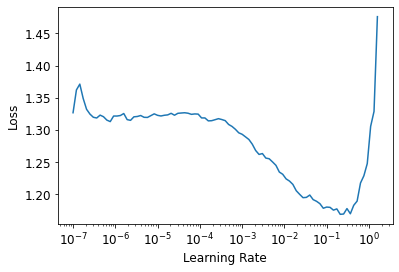

In [365]:
# Find the best learning rate for training the classifer
learn_model.lr_find()

In [366]:
# Train the model one epoch with the min learning rate from previous step
learn_model.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.768575,0.513330,0.808542,0.808542,00:18


In [367]:
# Freeze all the layers in the model except for the last two and train again with a smaller learning rate, the sliced values follows the instructions as per Jeremy Howard's FastAI course
learn_model.freeze_to(-2)
learn_model.fit_one_cycle(1, slice(2e-2/(2.6**4), 2e-2))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.308788,0.121927,0.963974,0.963974,00:20


In [368]:
# Freeze all the layers in the model except for the last three and train again with a smaller learning rate, the sliced values follows the instructions as per Jeremy Howard's FastAI course
learn_model.freeze_to(-3)
learn_model.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.095999,0.044279,0.986636,0.986636,00:30


In [369]:
# Unfreeze all the layers in the model and train again with a smaller learning rate, the sliced values follows the instructions as per Jeremy Howard's FastAI course
learn_model.unfreeze()
learn_model.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.049525,0.034271,0.988960,0.988960,00:38
1,0.035538,0.030785,0.991284,0.991284,00:38
2,0.020503,0.022382,0.994189,0.994189,00:38
3,0.018317,0.019581,0.994770,0.994770,00:38
4,0.013616,0.020740,0.994189,0.994189,00:38


In [370]:
# Save the final trained model
learn_model.save('trained_model_eda')

Path('models/trained_model_eda.pth')

In [371]:
# Export the final trained model
learn_model.export()

In [372]:
# Load the final trained model
learn_model.load('trained_model_eda')

<AxesSubplot:>

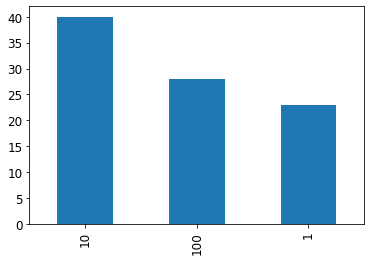

In [332]:
test['one_hot_labels'].value_counts().plot(kind='bar')

In [373]:
learn_model.show_results()

,text,category,category_
0,xxbos xxunk a the supreme court does not say when its over a case has to rise to the supreme court and they have to accept xxunk on the case there is nothing in this election xxunk that will get there since the only xxunk xxunk xxunk is late ballots in pa and biden does no xxunk need them https t xxunk xxunk n xxunk,Neutral,Neutral
1,xxbos i do nt xxunk with what you say he is not fighting a good deal for the people he does not care about many of them he is xxunk the majority of the xxunk us people pay the xxunk when we get again years trump barack xxunk a good deal more for the people donald it xxunk down again https t xxunk xxunk xxunk,Pro_Biden,Pro_Biden
2,xxbos xxunk well xxunk i wish you the best in this then try to remember what your a good deal life was like in now and see how much better worse it is under biden try to have an open mind and lead with good positive example as always treat others the way you would like to be treated be a xxunk of hope,Neutral,Neutral
3,xxbos i was xxunk so xxunk to hear one of my xxunk kids ask if i supported trump or biden i said biden and she asked me why i wanted to say xxunk he s a xxunk who fucked up my country and xxunk xxunk lives but i xxunk my xxunk and gave my kid xxunk xxunk xxunk he s life time stupid xxunk,Pro_Trump,Pro_Trump
4,xxbos xxunk a the supreme court does not say when its over a case has to rise to the supreme court and they have to xxunk accept xxunk on the case there is nothing in this election that will get there since the only xxunk is late along ballots in pa and biden it does no need them https t xxunk xxunk n xxunk,Neutral,Neutral
5,xxbos xxunk xxunk trump would nt beat biden in any uk xxunk damn right he would nt as its a us election not a uk good one but there is much support for trump in the uk just not much media support actually probably not any but in that xxunk they are doing exactly what the xxunk do in the us maga,Pro_Biden,Pro_Biden
6,xxbos xxunk mr donald trump we love you too much i had a dream that you xxunk too in elections i m sure so win you xxunk congratulations i m very big fan of your son of donald trump jr i love him win much my dream to visit america and to xxunk with him xxunk donaldtrump https t xxunk xxunk xxunk,Pro_Trump,Pro_Trump
7,xxbos xxunk mr donald trump we love you too much i had a dream that you xxunk win in elections i m sure you xxunk win so congratulations i m very big fan of your son of donald trump jr i love him too much my dream to visit america and to xxunk with him xxunk donaldtrump https t xxunk xxunk xxunk,Pro_Trump,Pro_Trump
8,xxbos xxunk my xxunk my dream my prince dear donald trump indeed jr happy thanksgiving day to you wish you xxunk and happiness i love you so much i love your beautiful eyes i love your beautiful smile so much this is xxunk true love this is big love i love you xxunk thanksgiving https t xxunk xxunk xxunk xxunk e,Pro_Trump,Pro_Trump


In [374]:
interp = ClassificationInterpretation.from_learner(learn_model)

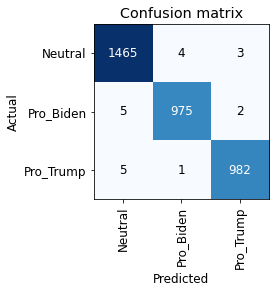

In [375]:
interp.plot_confusion_matrix()

In [376]:
interp.plot_top_losses(5, nrows=5)

,input,target,predicted,probability,loss
0,xxbos xxunk xxunk uselections byebyetrump https t xxunk xxunk xxunk,Neutral,Pro_Biden,0.9998778104782104,9.017216682434082
1,xxbos on back joebiden xxunk xxunk,Pro_Trump,Neutral,0.7988727688789368,4.504610061645508
2,xxbos xxunk makeamericagreatagain xxunk https t xxunk xxunk xxunk xxunk,Pro_Trump,Neutral,0.980010986328125,4.192615032196045
3,xxbos joebiden xxunk is back,Neutral,Pro_Biden,0.9762766361236572,3.855774402618408
4,xxbos is who xxunk biden trump,Pro_Biden,Neutral,0.9067657589912415,3.067262887954712


In [377]:
from sklearn.metrics import confusion_matrix, accuracy_score
test['preds'] = test['content'].apply(lambda row: learn_model.predict(row)[0])
print("Test Accuracy: ", accuracy_score(test['classes'], test['preds']))

Test Accuracy:  0.37362637362637363


In [304]:
test.to_csv("preds3.csv")

In [306]:
dl = learn_model.dls.test_dl(test['content'])

In [307]:
preds = learn_model.get_preds(dl=dl)

In [308]:
preds[0][0].cpu().numpy()

array([9.9689507e-01, 2.5875235e-03, 5.1738630e-04], dtype=float32)

In [309]:
preds[0][0].cpu().argmax(dim=-1)

TensorText(0)

In [310]:
test['target'] = preds[0].argmax(dim=-1)

In [311]:
test.head()

,Unnamed: 0,content,date,replyCount,retweetCount,likeCount,mentionedUsers,Pro Trump,Pro Biden,Neutral,one_hot_labels,classes,preds,target
0,0,@Prieto_de_Maria @Sanju_Verma_ @realDonaldTrump #Biden opposed #CAA #NRC and support Pakistani stand on JK and #Article370,2020-11-04 12:58:14+00:00,0,0,0,"[{'username': 'Prieto_de_Maria', 'displayname': 'Light_Yagami', 'id': 1137341225839628288, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}, {'username': 'Sanju_Verma_', 'displayname': 'Sanju Verma', 'id': 2441854915, 'description': None, 'rawDescription': None, 'descriptionUrls'...",0,0,1,1,Neutral,Neutral,0
1,1,@FoxNews #Trump applauded historical turn out of voters. And no evidence of what #Biden’s campaign manager called it”#outrageous”. Nadia must correctly refer to the words Trump said.&gt;Biden’s campaign manager calls Trump's statement outrageous. ABC News via @ABC - https://t.co/m5UzFp8pWi,2020-11-04 12:19:42+00:00,0,1,1,"[{'username': 'FoxNews', 'displayname': 'Fox News', 'id': 1367531, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}, {'username': 'ABC', 'displayname': 'ABC News', 'id': 28785486, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': N...",1,0,0,100,Pro_Trump,Pro_Biden,1
2,7,@ge0rgiasc0tt Can't imagine they are chomping at the bit to vote #Biden or #Trump ? 🙄 #ElectionDay,2020-11-03 23:48:59+00:00,0,0,0,"[{'username': 'ge0rgiasc0tt', 'displayname': 'G', 'id': 762339458, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}]",0,0,1,1,Neutral,Pro_Trump,2
3,9,"@IvankaTrump @kayleighmcenany @realDonaldTrump Sympathetic . Far better candidate than #Biden . But , #COVID19 will be the ' downfall ' More empathy and leading by example was required \n#ElectionDay",2020-11-03 09:00:13+00:00,0,0,0,"[{'username': 'IvankaTrump', 'displayname': 'Ivanka Trump', 'id': 52544275, 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None}, {'username': 'kayleighmcenany', 'displayname': 'Kayleigh McEnany', 'id': 259001548, 'description': None, 'rawDescription': None, 'descriptionUrls': None, ...",1,0,0,100,Pro_Trump,Neutral,0
4,10,Got my 2nd graders chanting “#Biden”,2020-11-03 07:17:00+00:00,1,0,0,NaN,0,1,0,10,Pro_Biden,Neutral,0


In [312]:
test.to_csv("preds4.csv")